In [1]:
import ast
import json
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns

from collections import defaultdict
from os.path import join
from comm_data import PreprocessedCommData

import sys
sys.path.append("..")

from seal.trainer.communication import *

sns.set_style("ticks")
LOOSELY_DASHED = (0, (5, 10))

In [2]:
paths = [
    join("..", "out", "data", "FedRL", "grid-3x3", "new_ranked.csv"),
    join("..", "out", "data", "MARL",  "grid-3x3", "new_ranked.csv"),
    join("..", "out", "data", "SARL",  "grid-3x3", "new_ranked.csv")
]

dfs = [
    PreprocessedCommData.preprocess(path, ranked=True, is_sarl="SARL" in path)
    for path in paths
]
df = pd.concat(dfs)
df.reset_index(inplace=True)
df.head()
# pre_df = PreprocessedCommData.preprocess(df, ranked=True)
# pre_df.head()

,index,round,timesteps_total,trainer,iteration,ranked,episode_reward_mean,policy_reward,comm_type,comm_cost,total_comm_cost
0,0,0,4000,FedRL,1,True,-25.735379,-3.245381,tls-to-edge-policy-comms,1,461330
1,1,0,4000,FedRL,1,True,-25.735379,-6.359717,tls-to-edge-policy-comms,1,461330
2,2,0,4000,FedRL,1,True,-25.735379,-5.488769,tls-to-edge-policy-comms,1,461330
3,3,0,4000,FedRL,1,True,-25.735379,-1.427482,tls-to-edge-policy-comms,1,461330
4,4,0,4000,FedRL,1,True,-25.735379,-1.567791,tls-to-edge-policy-comms,1,461330


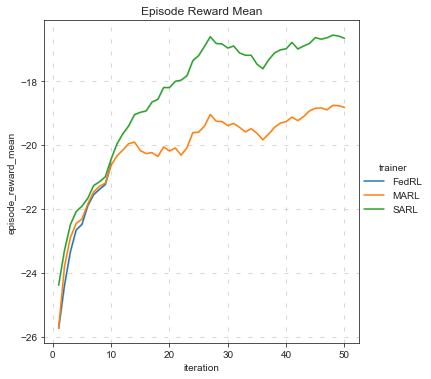

In [3]:
f = sns.relplot(data=df, kind="line", x="iteration", y="episode_reward_mean", hue="trainer")
sns.despine(top=False, right=False, left=False, bottom=False)
plt.grid(linestyle=LOOSELY_DASHED)
plt.title("Episode Reward Mean")
plt.show()

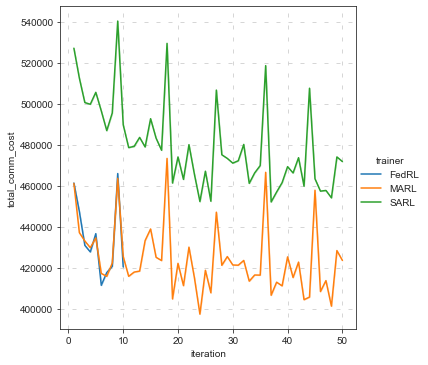

In [4]:
f = sns.relplot(data=df, kind="line", x="iteration", y="total_comm_cost", hue="trainer")
sns.despine(top=False, right=False, left=False, bottom=False)
plt.grid(linestyle=LOOSELY_DASHED)
plt.show()

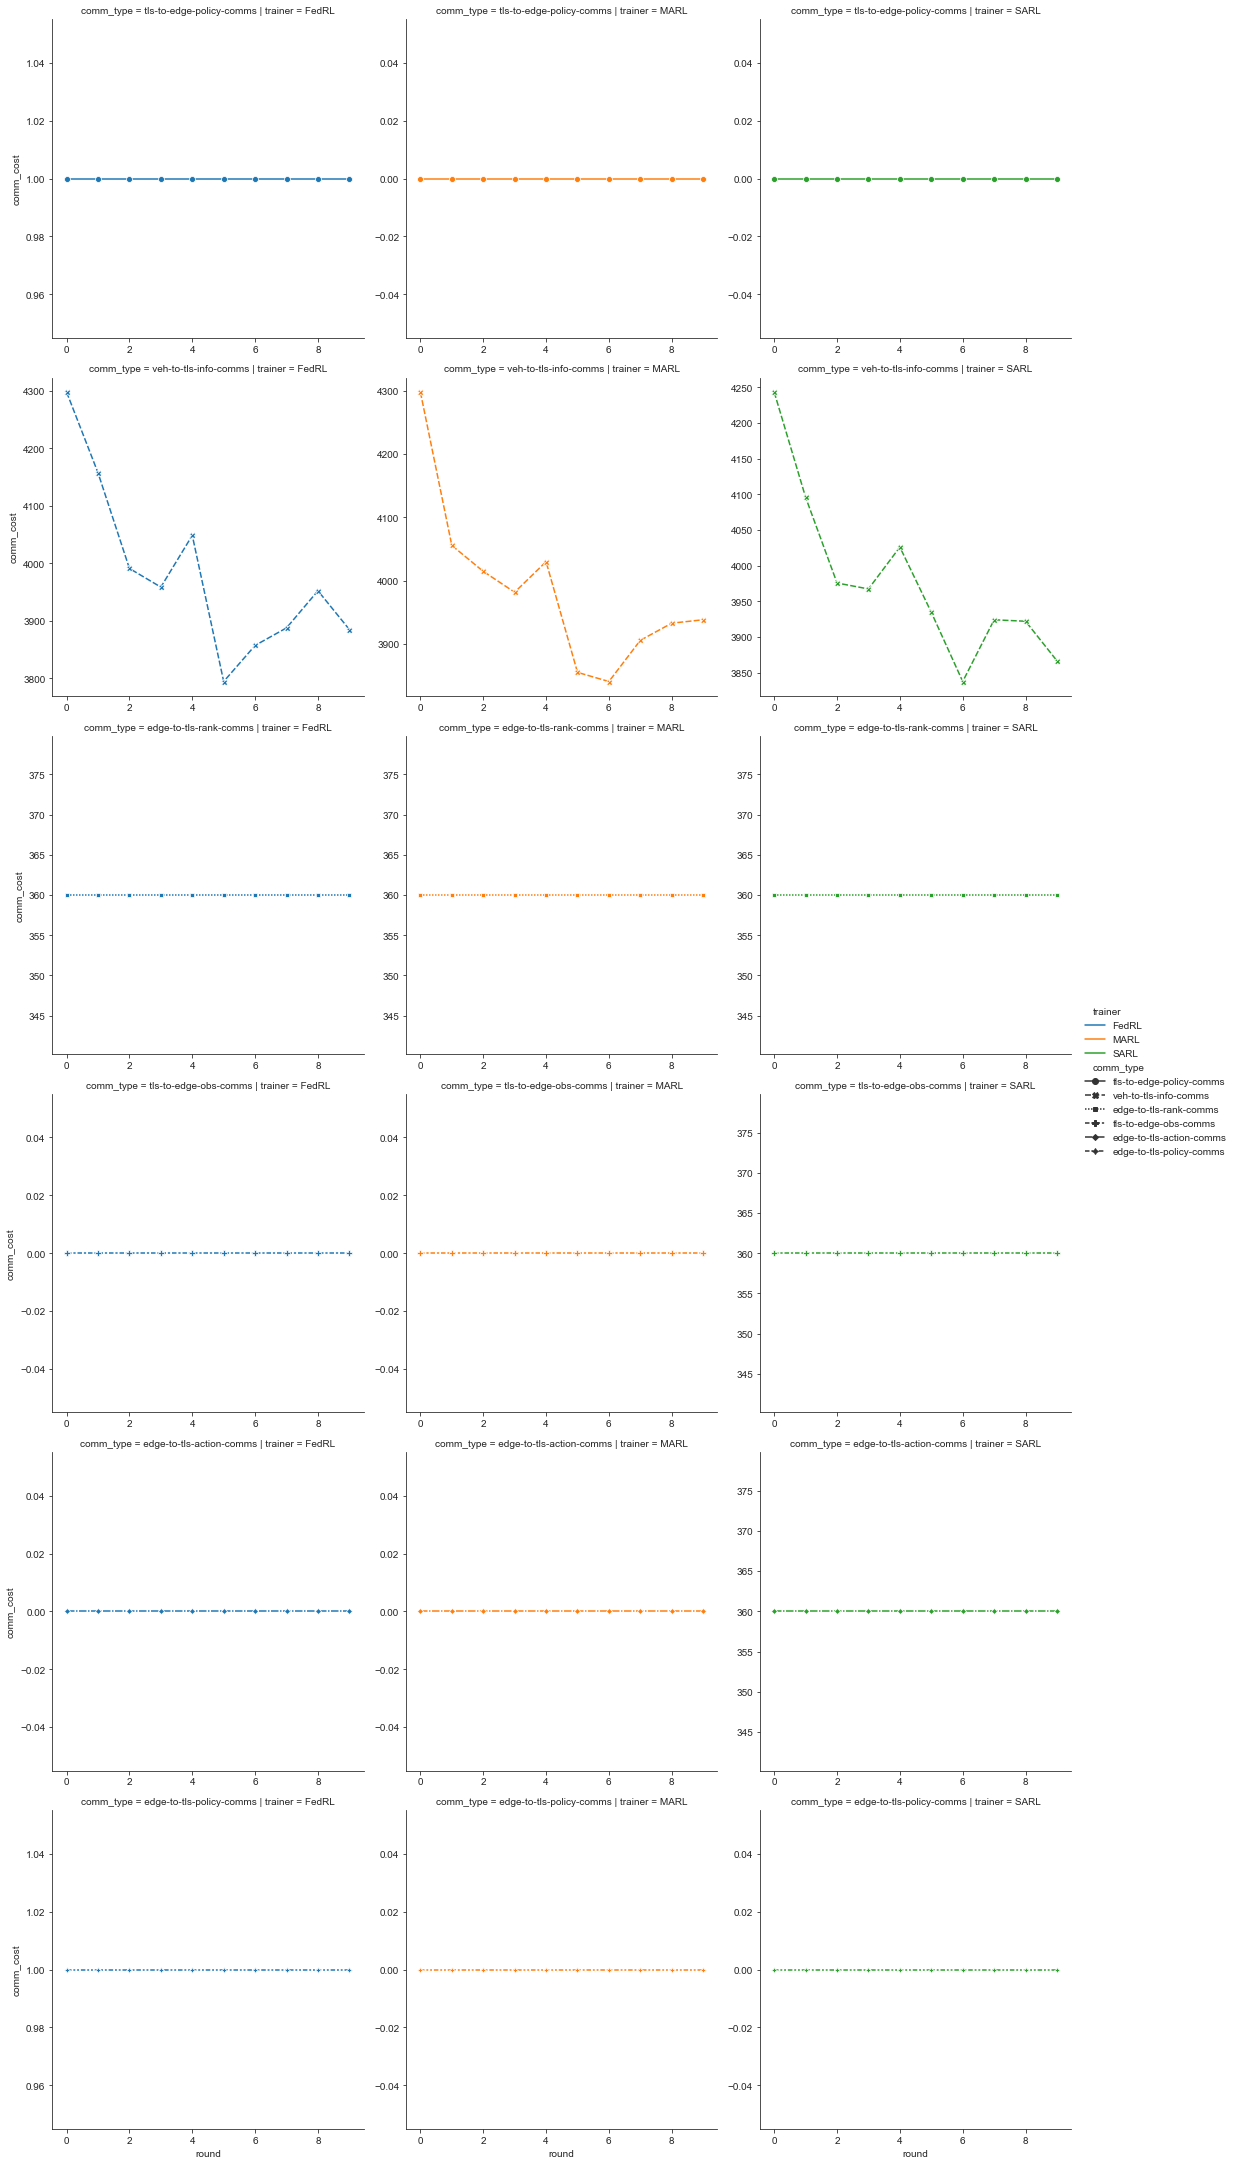

In [5]:
sns.relplot(
    data=df.query("round < 10"), 
    kind="line", 
    x="round", 
    y="comm_cost", 
    style="comm_type", 
    row="comm_type", 
    col="trainer",
    hue="trainer",
    markers=True,
    facet_kws={"sharex": False, "sharey": False},
    ci=None
)
plt.show()